# Plot the band structure for phonons

Information about the k-path can be found in **band.yaml** in distance section.

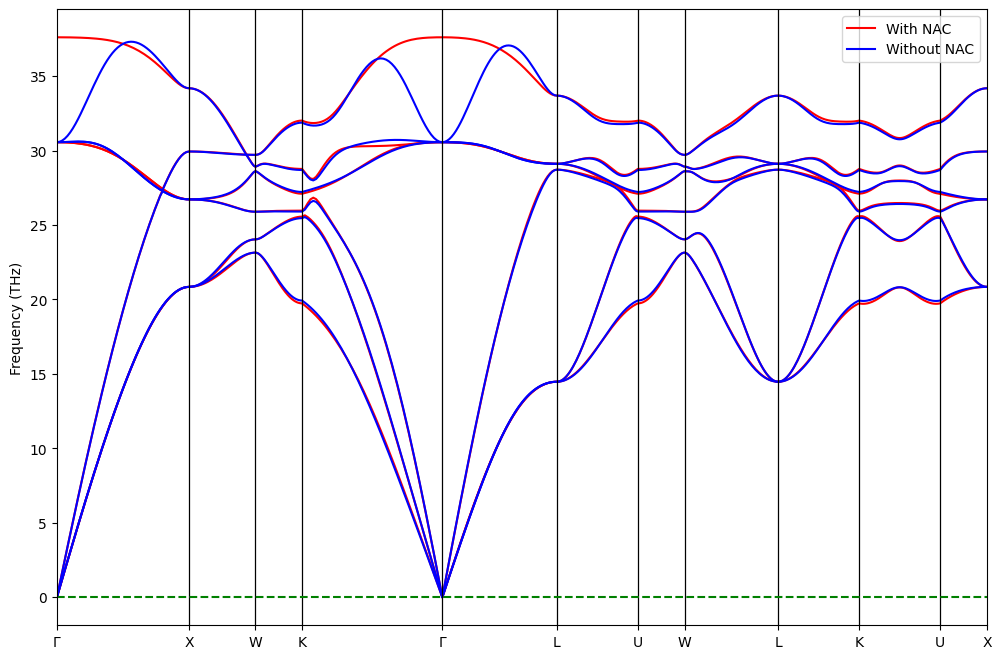

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Cargar los archivos de datos
data = np.loadtxt("bs_with_nac.dat")
data1 = np.loadtxt("bs_without_nac.dat")

# Crear una figura y ejes
fig, ax = plt.subplots()

# Función para graficar bloques de datos con un color específico
def plot_blocks(data, color, label):
    # Detectar los cambios que indican la separación de bloques
    is_block_start = np.concatenate(([True], np.diff(data[:, 0]) < 0))
    block_indices = np.where(is_block_start)[0]

    # Graficar cada bloque por separado
    for i in range(len(block_indices)):
        if i < len(block_indices) - 1:
            block_data = data[block_indices[i]:block_indices[i + 1]]
        else:
            block_data = data[block_indices[i]:]  # Último bloque

        # Plot the block as unconnected lines between blocks
        ax.plot(block_data[:, 0], block_data[:, 1], linestyle='-', markersize=1, c=color, label=label if i == 0 else "")

plot_blocks(data, 'r', 'With NAC')    # bs_with_nac.dat
plot_blocks(data1, 'b', 'Without NAC') # bs_without_nac.dat

k_path = [0.0, 0.2758371, 0.4137557, 0.5112789, 0.8038483, 1.0427303, 1.2116454, 1.3091685, 1.5042148, 1.6731299, 1.8420449, 1.9395681, ]

for x in k_path[1:-1]:
    ax.axvline(x=x, color='k', linestyle='-', linewidth=0.9)
    
ax.set_ylabel('Frequency (THz)')
fig.set_size_inches(12, 8)
#plt.ylim(-4, 8)
plt.xlim(0.0, 1.9395681)
plt.axhline(y = 0.00, color = 'g',linestyle = 'dashed')
ax.set_xticks(k_path)
ax.set_xticklabels(['$\\Gamma$','X','W', 'K', '$\\Gamma$', 'L', 'U', 'W', 'L', 'K', 'U', 'X'])
plt.legend()
#plt.savefig('bst_2.png', dpi=150, bbox_inches='tight')
plt.show()